In [ ]:
from google.colab import drive
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf 
import tensorflow.keras as tfk 
import tensorflow.keras.layers as tfkl 
plt.rc('font', size=16) 
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn import preprocessing 


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [ ]:
# Random seed for reproducibility
seed = 89
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ann_challenge2/annHomework2

/content/drive/.shortcut-targets-by-id/1MSnaIk1WNF6pWaDixVGVWqHvx61VG3_y/annHomework2


In [ ]:
x_train = np.load(r'x_train.npy')
y_train = np.load(r'y_train.npy')

In [ ]:
x_train.shape, y_train.shape 

((2429, 36, 6), (2429,))

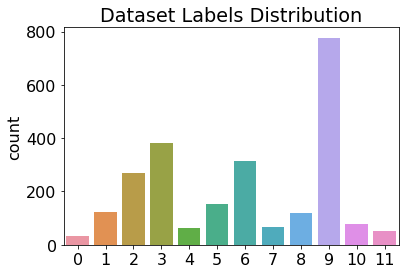

In [ ]:
# plot labels distribution 
sns.countplot( x = y_train) 
plt.title('Dataset Labels Distribution')
plt.show()

In [ ]:
labels = np.unique(np.fromiter([i for i in y_train], np.int32) )
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=labels, y=y_train) 

In [ ]:
# interpolation 
from scipy.interpolate import interp1d
x_new = [] 
for el in x_train: 
    interp = interp1d(x=np.arange(36), y=el, axis=0, kind='cubic')
    el = interp(np.arange(0, 35, .3))
    x_new.append(el)
x_new = np.array(x_new) 
print(x_new.shape) 
x_train = x_new
y_train = tfk.utils.to_categorical(y_train) 

(2429, 117, 6)


In [ ]:
train_data = np.concatenate([x for x in x_train]) 
scaler = preprocessing.StandardScaler().fit(train_data)

x_train_trans = [] 
for el in x_train: 
  x_train_trans.append(scaler.transform(el))
del x_train 

x_train = np.asarray(x_train_trans) 
x_train

array([[[ 3.12954160e-02, -1.26683197e-02, -4.09212952e-02,
         -7.67097948e-02, -6.54563660e-02, -1.28408020e-01],
        [ 1.85450114e-02, -1.72277786e-02, -3.41257212e-02,
         -6.39470377e-02, -9.37877302e-02, -3.99561065e-02],
        [-1.61748253e-03, -2.26757961e-02, -2.58370532e-02,
         -5.21885500e-02, -8.82578456e-02,  1.26185885e-02],
        ...,
        [ 2.92121769e-01,  8.64184618e-02,  2.46020690e+00,
          1.83637912e+00,  1.86760338e+01,  1.19483326e+00],
        [ 2.36585982e-01,  5.49244493e-02,  2.16052902e+00,
          1.77476763e+00,  1.92397340e+01,  1.40341531e+00],
        [ 1.76763600e-01,  2.95116871e-02,  1.71227815e+00,
          1.51622362e+00,  1.64288577e+01,  1.43310326e+00]],

       [[-2.91376343e-02, -2.39096432e-02, -4.38676844e-03,
         -5.33291264e-02, -4.87959024e-02, -3.18114542e-02],
        [-2.96265968e-02, -1.57240242e-02, -1.07058471e-02,
         -7.15750697e-02, -5.71934891e-02, -5.07341617e-02],
        [-3.04918

In [ ]:
# check 
print(x_train.shape, y_train.shape) 
x_train[0][1]
y_train[0]

(2429, 117, 6) (2429, 12)


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Defining the training sets**

In [ ]:
x_train1, x_test1, y_train1, y_test1 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=1, stratify=y_train)
x_train2, x_test2, y_train2, y_test2 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=2, stratify=y_train)
x_train3, x_test3, y_train3, y_test3 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=3, stratify=y_train)
x_train4, x_test4, y_train4, y_test4 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=4, stratify=y_train)
x_train5, x_test5, y_train5, y_test5 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=5, stratify=y_train)
x_train6, x_test6, y_train6, y_test6 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=6, stratify=y_train)
x_train7, x_test7, y_train7, y_test7 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=7, stratify=y_train)
x_train8, x_test8, y_train8, y_test8 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=8, stratify=y_train)
x_train9, x_test9, y_train9, y_test9 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=9, stratify=y_train)
x_train10, x_test10, y_train10, y_test10 = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=10, stratify=y_train)

# **LSTM VANILLA**

In [ ]:
input_shape = (117,6)

#### 1D Convolutional Neural Network

![](https://drive.google.com/uc?export=view&id=10B7c-F58-eNr6CP7D_UZeVp0gTeYMrFQ
)

In [ ]:
def build_ffnn_classifier(input_shape, classes):
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    cnn = tfkl.Conv1D(256,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(256,3,padding='same',activation='relu')(cnn)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(256,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.3, seed=seed)(gap)


    hidden_layer1 = tfkl.Dense(units=256, activation ='relu', name = 'Hidden1', kernel_regularizer = tfk.regularizers.L2(l2 = 0.0001))(dropout) 

    hidden_layer2 = tfkl.Dense(units=256, activation ='relu', name = 'Hidden2', kernel_regularizer = tfk.regularizers.L2(l2 = 0.0001))(hidden_layer1) 

    
    output_layer = tfkl.Dense(classes, activation='softmax', 
                              kernel_initializer=tfk.initializers.GlorotUniform(seed))(hidden_layer2)
      
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
    return model

In [ ]:
model1 = build_ffnn_classifier(input_shape, 12)
model2 = build_ffnn_classifier(input_shape, 12)
model3 = build_ffnn_classifier(input_shape, 12)
model4 = build_ffnn_classifier(input_shape, 12)
model5 = build_ffnn_classifier(input_shape, 12)
model6 = build_ffnn_classifier(input_shape, 12)
model7 = build_ffnn_classifier(input_shape, 12)
model8 = build_ffnn_classifier(input_shape, 12)
model9 = build_ffnn_classifier(input_shape, 12)
model10 = build_ffnn_classifier(input_shape, 12)

model7.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 117, 6)]          0         
                                                                 
 conv1d_18 (Conv1D)          (None, 117, 256)          4864      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 58, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 58, 256)           196864    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 29, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 29, 256)           196864

# training

In [ ]:
history1 = model1.fit(
    x = x_train1,
    y = y_train1,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test1, y_test1),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 11s 33ms/step - loss: 2.2523 - accuracy: 0.3387 - val_loss: 1.9855 - val_accuracy: 0.3519 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 8ms/step - loss: 1.9237 - accuracy: 0.3726 - val_loss: 1.8568 - val_accuracy: 0.4033 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 10ms/step - loss: 1.8624 - accuracy: 0.4035 - val_loss: 1.7913 - val_accuracy: 0.3992 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 8ms/step - loss: 1.7485 - accuracy: 0.4277 - val_loss: 1.6454 - val_accuracy: 0.4506 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 10ms/step - loss: 1.6302 - accuracy: 0.4498 - val_loss: 1.5087 - val_accuracy: 0.5041 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 1.6597 - accuracy: 0.4637 - val_loss: 1.5617 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 8ms/step - loss:

In [ ]:
history2 = model2.fit(
    x = x_train2,
    y = y_train2,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test2, y_test2),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 2s 32ms/step - loss: 2.2665 - accuracy: 0.3345 - val_loss: 1.9695 - val_accuracy: 0.3724 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 1s 20ms/step - loss: 1.9386 - accuracy: 0.3850 - val_loss: 1.9211 - val_accuracy: 0.4198 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 1s 22ms/step - loss: 1.8731 - accuracy: 0.3953 - val_loss: 1.8601 - val_accuracy: 0.4198 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 1s 20ms/step - loss: 1.7560 - accuracy: 0.4364 - val_loss: 1.7599 - val_accuracy: 0.4218 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 1s 19ms/step - loss: 1.6452 - accuracy: 0.4632 - val_loss: 1.6421 - val_accuracy: 0.4280 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 14ms/step - loss: 1.5693 - accuracy: 0.4936 - val_loss: 1.5578 - val_accuracy: 0.4671 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 14ms/step - lo

In [ ]:
history3 = model3.fit(
    x = x_train3,
    y = y_train3,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test3, y_test3),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 2s 19ms/step - loss: 2.2787 - accuracy: 0.3299 - val_loss: 2.0211 - val_accuracy: 0.3539 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 12ms/step - loss: 1.9396 - accuracy: 0.3736 - val_loss: 1.8829 - val_accuracy: 0.3765 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 12ms/step - loss: 1.8369 - accuracy: 0.3937 - val_loss: 1.8117 - val_accuracy: 0.4095 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 12ms/step - loss: 1.7762 - accuracy: 0.4179 - val_loss: 1.7198 - val_accuracy: 0.4177 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 10ms/step - loss: 1.6125 - accuracy: 0.4550 - val_loss: 1.7624 - val_accuracy: 0.4300 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 12ms/step - loss: 1.5484 - accuracy: 0.4915 - val_loss: 1.6079 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 12ms/step - lo

In [ ]:
history4 = model4.fit(
    x = x_train4,
    y = y_train4,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test4, y_test4),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 1s 18ms/step - loss: 2.2454 - accuracy: 0.3356 - val_loss: 1.9698 - val_accuracy: 0.3621 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 9ms/step - loss: 1.9079 - accuracy: 0.3865 - val_loss: 1.8393 - val_accuracy: 0.4259 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 8ms/step - loss: 1.8374 - accuracy: 0.3978 - val_loss: 1.7651 - val_accuracy: 0.4198 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 9ms/step - loss: 1.7410 - accuracy: 0.4287 - val_loss: 1.7971 - val_accuracy: 0.4362 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 9ms/step - loss: 1.7036 - accuracy: 0.4385 - val_loss: 1.6387 - val_accuracy: 0.4733 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 1.5804 - accuracy: 0.4776 - val_loss: 1.6367 - val_accuracy: 0.4691 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 8ms/step - loss: 1.

In [ ]:
history5 = model5.fit(
    x = x_train5,
    y = y_train5,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test5, y_test5),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 1s 16ms/step - loss: 2.2474 - accuracy: 0.3423 - val_loss: 2.0772 - val_accuracy: 0.3477 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 8ms/step - loss: 1.9811 - accuracy: 0.3628 - val_loss: 1.8907 - val_accuracy: 0.4012 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 8ms/step - loss: 1.8816 - accuracy: 0.3994 - val_loss: 1.8735 - val_accuracy: 0.4095 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 10ms/step - loss: 1.7853 - accuracy: 0.4246 - val_loss: 1.8004 - val_accuracy: 0.4136 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 1.7033 - accuracy: 0.4292 - val_loss: 1.6558 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 10ms/step - loss: 1.5879 - accuracy: 0.4750 - val_loss: 1.5922 - val_accuracy: 0.4609 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 8ms/step - loss: 

In [ ]:
history6 = model6.fit(
    x = x_train6,
    y = y_train6,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test6, y_test6),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 1s 16ms/step - loss: 2.2947 - accuracy: 0.3227 - val_loss: 2.0244 - val_accuracy: 0.3519 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 9ms/step - loss: 1.9514 - accuracy: 0.3700 - val_loss: 1.8827 - val_accuracy: 0.3889 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 9ms/step - loss: 1.8335 - accuracy: 0.4076 - val_loss: 1.9210 - val_accuracy: 0.3827 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 8ms/step - loss: 1.8277 - accuracy: 0.4174 - val_loss: 1.7854 - val_accuracy: 0.4115 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 1.7037 - accuracy: 0.4416 - val_loss: 1.6046 - val_accuracy: 0.4465 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 8ms/step - loss: 1.6431 - accuracy: 0.4627 - val_loss: 1.6128 - val_accuracy: 0.4733 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 9ms/step - loss: 1.

In [ ]:
history7 = model7.fit(
    x = x_train7,
    y = y_train7,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test7, y_test7),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 1s 15ms/step - loss: 2.2583 - accuracy: 0.3325 - val_loss: 2.0090 - val_accuracy: 0.3560 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 10ms/step - loss: 1.9318 - accuracy: 0.3793 - val_loss: 1.8871 - val_accuracy: 0.3765 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 8ms/step - loss: 1.8462 - accuracy: 0.4035 - val_loss: 1.8684 - val_accuracy: 0.4198 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 8ms/step - loss: 1.7328 - accuracy: 0.4297 - val_loss: 2.0329 - val_accuracy: 0.4547 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 1.6560 - accuracy: 0.4375 - val_loss: 1.6307 - val_accuracy: 0.4835 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 1.5172 - accuracy: 0.5028 - val_loss: 1.5879 - val_accuracy: 0.5123 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 10ms/step - loss: 

In [ ]:
history8 = model8.fit(
    x = x_train8,
    y = y_train8,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test8, y_test8),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 1s 16ms/step - loss: 2.2501 - accuracy: 0.3227 - val_loss: 1.9926 - val_accuracy: 0.3745 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 8ms/step - loss: 1.9358 - accuracy: 0.3747 - val_loss: 1.8585 - val_accuracy: 0.4074 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 8ms/step - loss: 1.8481 - accuracy: 0.3942 - val_loss: 1.7869 - val_accuracy: 0.4053 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 8ms/step - loss: 1.7389 - accuracy: 0.4256 - val_loss: 1.7194 - val_accuracy: 0.4403 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 1.6161 - accuracy: 0.4663 - val_loss: 1.6986 - val_accuracy: 0.4300 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 8ms/step - loss: 1.5906 - accuracy: 0.4802 - val_loss: 1.5134 - val_accuracy: 0.4733 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 9ms/step - loss: 1.

In [ ]:
history9 = model9.fit(
    x = x_train9,
    y = y_train9,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test9, y_test9),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 1s 19ms/step - loss: 2.2761 - accuracy: 0.3227 - val_loss: 1.9394 - val_accuracy: 0.3786 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 10ms/step - loss: 1.9174 - accuracy: 0.3757 - val_loss: 1.8481 - val_accuracy: 0.4012 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 9ms/step - loss: 1.8430 - accuracy: 0.4143 - val_loss: 1.7977 - val_accuracy: 0.4177 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 8ms/step - loss: 1.7121 - accuracy: 0.4375 - val_loss: 1.6733 - val_accuracy: 0.4568 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 9ms/step - loss: 1.6355 - accuracy: 0.4611 - val_loss: 1.6315 - val_accuracy: 0.4506 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 1.5115 - accuracy: 0.4910 - val_loss: 1.5150 - val_accuracy: 0.5473 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 10ms/step - loss: 

In [ ]:
history10 = model10.fit(
    x = x_train10,
    y = y_train10,
    batch_size = 64,
    epochs = 200,
    validation_data = (x_test10, y_test10),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=15, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 1s 16ms/step - loss: 2.2452 - accuracy: 0.3248 - val_loss: 2.0305 - val_accuracy: 0.3621 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 0s 9ms/step - loss: 1.9361 - accuracy: 0.3793 - val_loss: 1.9156 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 0s 10ms/step - loss: 1.8540 - accuracy: 0.3932 - val_loss: 1.7960 - val_accuracy: 0.4259 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 0s 9ms/step - loss: 1.7301 - accuracy: 0.4370 - val_loss: 1.7523 - val_accuracy: 0.4136 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 1.6122 - accuracy: 0.4658 - val_loss: 1.7528 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 8ms/step - loss: 1.5569 - accuracy: 0.4797 - val_loss: 1.4865 - val_accuracy: 0.4918 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 0s 9ms/step - loss: 1

# evaluation

**evaluation of a single model**

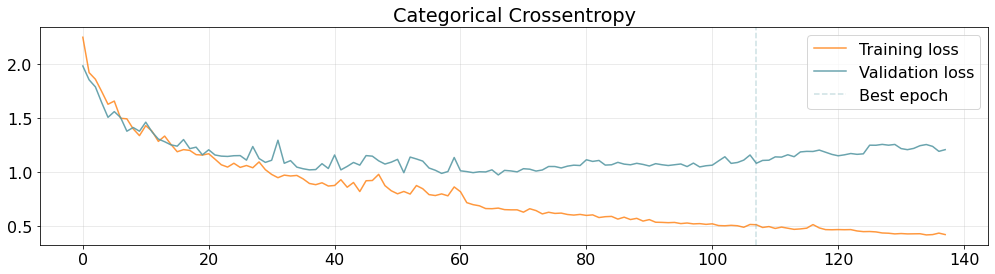

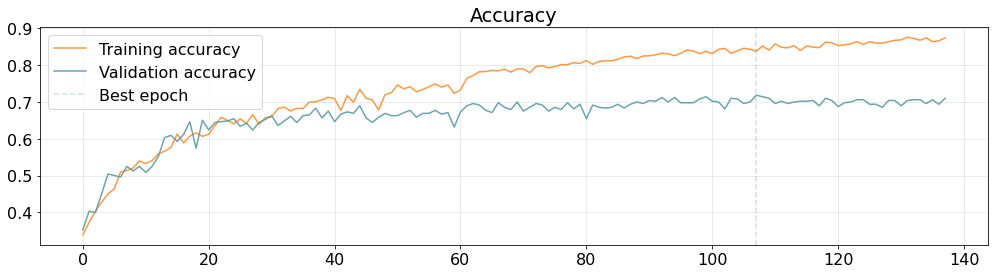

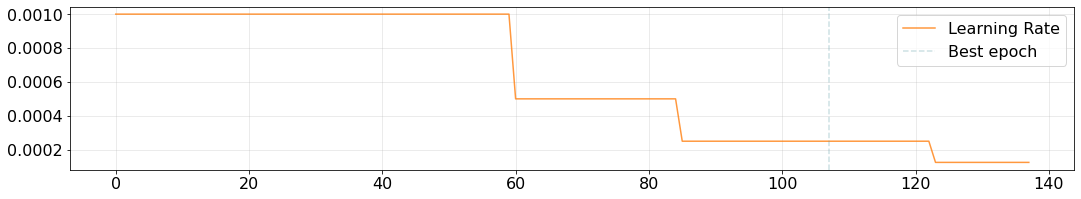

In [ ]:
best_epoch = np.argmax(history1['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history1['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history1['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history1['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history1['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history1['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
#model.save('1DCNN')

In [ ]:
predictions = model1.predict(x_test1)
predictions.shape

16/16 [==============================] - 0s 9ms/step


(486, 12)

16/16 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.0000e+00
{'loss': 0.05330146849155426, 'accuracy': 0.0}
16/16 [==============================] - 0s 2ms/step
Accuracy: 0.7181
Precision: 0.6846
Recall: 0.5991
F1: 0.6249
F1 (per class): [0.72727273 0.57142857 0.97196262 0.54545455 0.         0.41935484
 0.88888889 0.41666667 0.93617021 0.74846626 0.96551724 0.30769231]


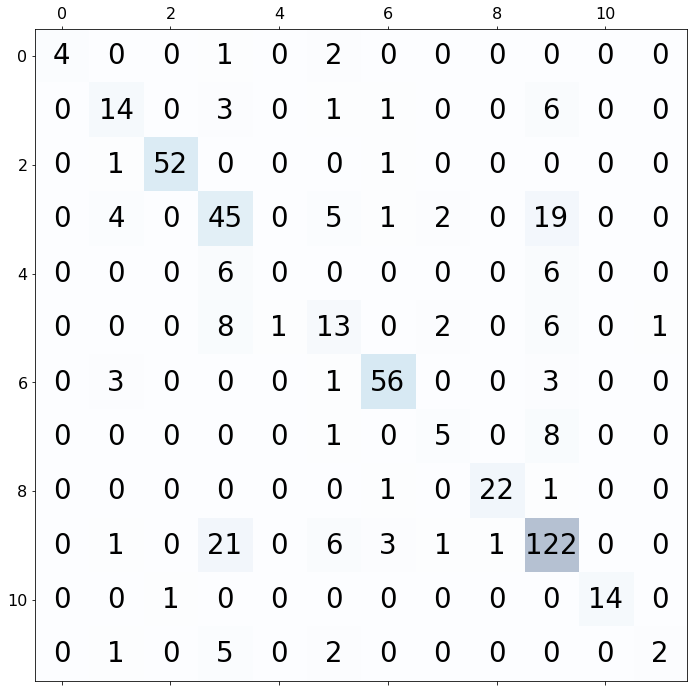

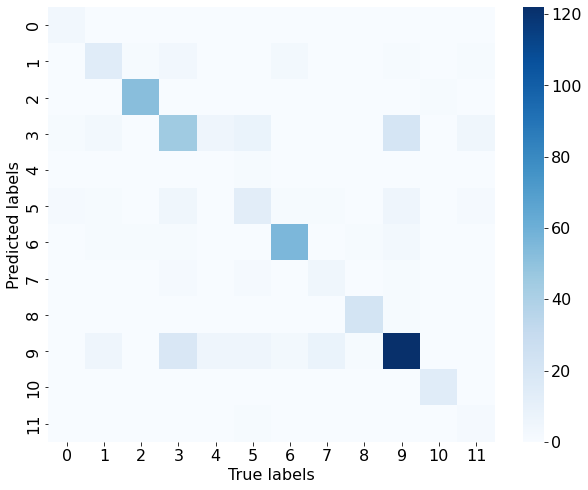

In [ ]:
metrics = model1.evaluate(x_test1, return_dict=True)
print(metrics)

labels = y_test1 
predictions = model1.predict(x_test1) 
assert len(labels) == len(predictions)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1_classes = f1_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1), average=None)

print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))
print('F1 (per class):' ,f1_classes)

# Plot the confusion matrix
ig, ax = plt.subplots(figsize=(12,12))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

        
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

**Model averaging test (obviously the following evaluation is not reliable)**

16/16 [==============================] - 0s 2ms/step
Accuracy: 0.8807
Precision: 0.9129
Recall: 0.7767
F1: 0.8185
F1 (per class): [0.92307692 0.92       1.         0.77124183 0.375      0.7037037
 0.984375   0.69565217 0.9787234  0.89880952 1.         0.57142857]


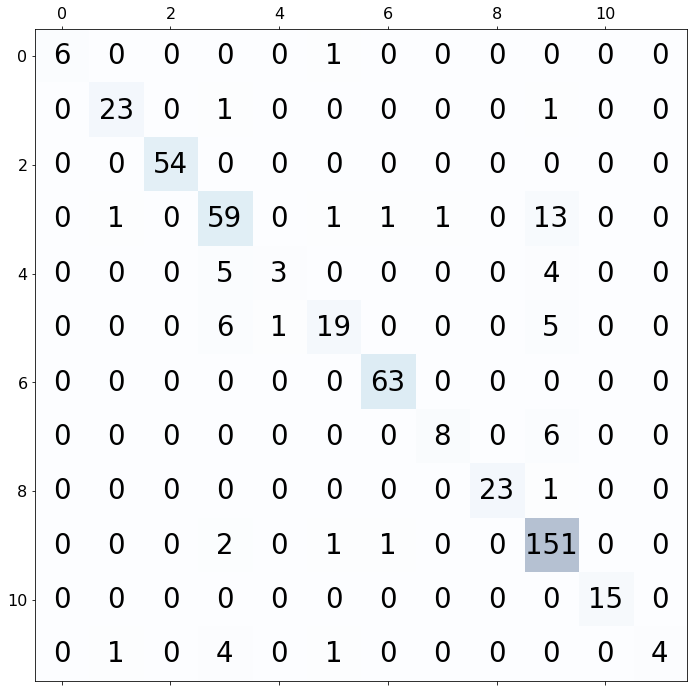

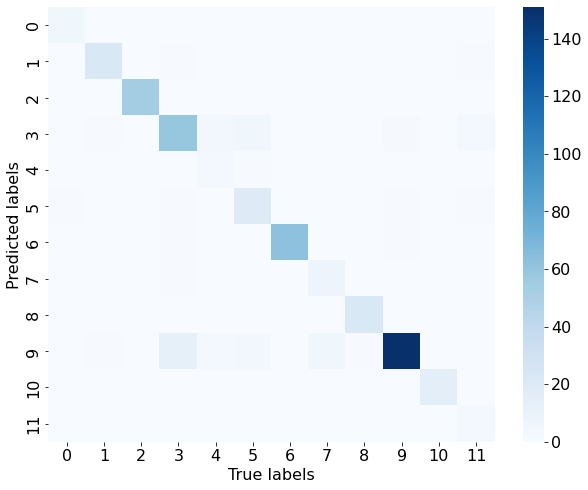

In [ ]:
labels = y_test1 #for example 
p1 = model1.predict(x_test1)
p2 = model2.predict(x_test1)
p3 = model3.predict(x_test1)
p4 = model4.predict(x_test1)
p5 = model5.predict(x_test1)
p6 = model6.predict(x_test1)
p7 = model7.predict(x_test1)
p8 = model8.predict(x_test1)
p9 = model9.predict(x_test1)
p10 = model10.predict(x_test1)

predictions = (p1+p2+p3+p4+p5+p6+p7+p8+p9+p10)/10.0
assert len(labels) == len(predictions)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1_classes = f1_score(np.argmax(labels, axis=-1), np.argmax(predictions, axis=-1), average=None)

print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))
print('F1 (per class):' ,f1_classes)

# Plot the confusion matrix
ig, ax = plt.subplots(figsize=(12,12))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

        
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

# save

In [ ]:
%cd /content/drive/MyDrive/ann_challenge2/modelli_bagging

/content/drive/MyDrive/ann_challenge2/modelli_bagging


In [ ]:
model1.save("bagging_model1")
model2.save("bagging_model2")
model3.save("bagging_model3")
model4.save("bagging_model4")
model5.save("bagging_model5")
model6.save("bagging_model6")
model7.save("bagging_model7")
model8.save("bagging_model8")
model9.save("bagging_model9")
model10.save("bagging_model10")

In [ ]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 6,
 'n_samples_seen_': 284193,
 'mean_': array([ 9.7380162 , 18.01140827, 26.70841189, 32.42400051, 33.8400954 ,
        31.34904435]),
 'var_': array([ 63062.52096298, 603339.45305708, 484803.54050911, 461821.14745811,
        442735.39552485, 527209.68247186]),
 'scale_': array([251.12252182, 776.74928584, 696.27834988, 679.57423984,
        665.38364537, 726.09206198])}